<a href="https://colab.research.google.com/github/otavioml/Chess-Data-Analysis/blob/main/C%C3%B3pia_de_Chess_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de partidas de xadrez do Lichess



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
from scipy import stats

In [ ]:
plt.rcParams['figure.figsize']  = (16, 14)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/otavioml/Chess-Data-Analysis/main/Chess100k.csv')

In [ ]:
#Limpeza dos dados
#Padronização do tipo da coluna Numer_of_Moves
df['Number_of_Moves'] =  pd.to_numeric(df['Number_of_Moves'], errors='coerce')

#Remoção das partidas com menos de 3 movimentos que foram abandonadas ou terminadas por tempo
condition = (df['Number_of_Moves'] >= 3) | (df['Termination'] == 'Normal')
df = df.loc[condition]

#limpeza das linhas nulas
df = df.dropna()


In [ ]:
#Removing outliers using zscore
#df['IT_Zscore'] = stats.zscore(df['InitialTime'])
#df['Inc_Zscore'] = stats.zscore(df['Increment'])
#condition = (df['IT_Zscore'] <= 3) & (df['Inc_Zscore'] <= 3)
#df = df.loc[condition]

In [ ]:
#Adição das colunas média e razão
df['RatioElo'] = df['BlackElo']/df['WhiteElo']
df['MatchElo'] = (df['BlackElo']+df['WhiteElo'])/2

#Colunas de interesse
df = df[['WhiteElo','BlackElo','RatioElo','MatchElo','Winner','InitialTime','Increment','TimeControl','Opening','ECO','Number_of_Moves']]
df.shape

(99569, 11)

In [ ]:
df.head()

,WhiteElo,BlackElo,RatioElo,MatchElo,Winner,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves
0,1639,1403,0.856010,1521.0,White,600,8,Rapid,French Defense: Normal Variation,C00,13
1,1654,1919,1.160218,1786.5,White,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18
2,1643,1747,1.063299,1695.0,White,420,17,Rapid,Four Knights Game: Italian Variation,C50,11
3,1824,1973,1.081689,1898.5,Black,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47
4,1765,1815,1.028329,1790.0,Black,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23


In [ ]:
#Short description of the dataframe
df.describe().apply(lambda x: x.apply('{0:.2f}'.format))

,WhiteElo,BlackElo,RatioElo,MatchElo,InitialTime,Increment,Number_of_Moves
count,99569.00,99569.00,99569.00,99569.00,99569.00,99569.00,99569.00
mean,1606.69,1596.46,1.00,1601.58,300.89,2.91,34.01
std,202.38,207.59,0.13,178.19,288.00,4.39,16.23
min,782.00,789.00,0.43,974.50,0.00,0.00,1.00
25%,1476.00,1464.00,0.92,1478.50,120.00,0.00,23.00
50%,1602.00,1589.00,1.00,1594.00,240.00,1.00,32.00
75%,1740.00,1733.00,1.07,1720.00,360.00,5.00,43.00
max,2403.00,2386.00,2.34,2264.00,1800.00,30.00,153.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1bb6d79d0>,
      dtype=object)

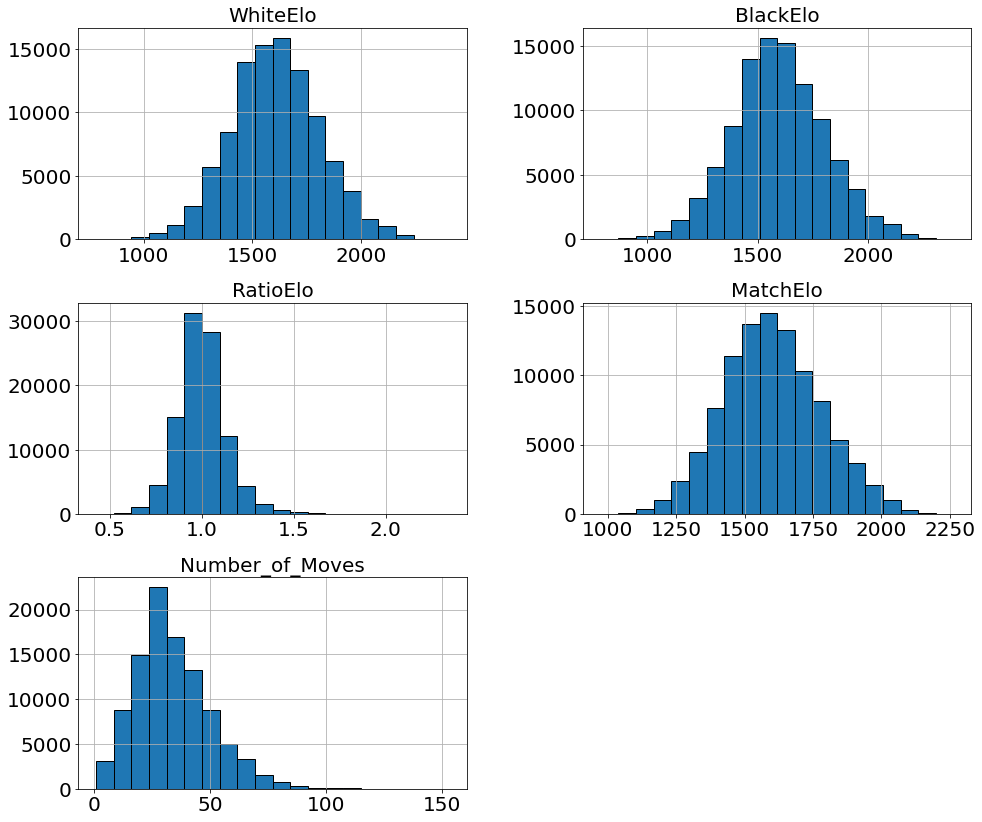

In [ ]:
df.hist(bins=20, column=['WhiteElo', 'BlackElo', 'RatioElo', 'MatchElo', 'Number_of_Moves'],edgecolor='black',)

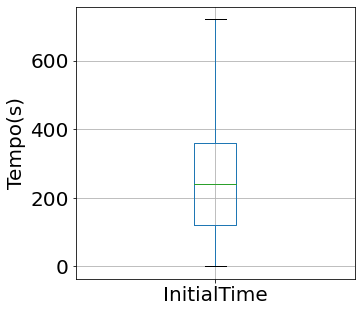

In [ ]:
df.boxplot(column=['InitialTime'], showfliers=False, figsize=(5,5))
plt.ylabel('Tempo(s)')
plt.show()

In [ ]:
#Removing outliers using zscore
df['IT_Zscore'] = stats.zscore(df['InitialTime'])
df['Inc_Zscore'] = stats.zscore(df['Increment'])
condition = (df['IT_Zscore'] <= 3) & (df['Inc_Zscore'] <= 3)
df = df.loc[condition]

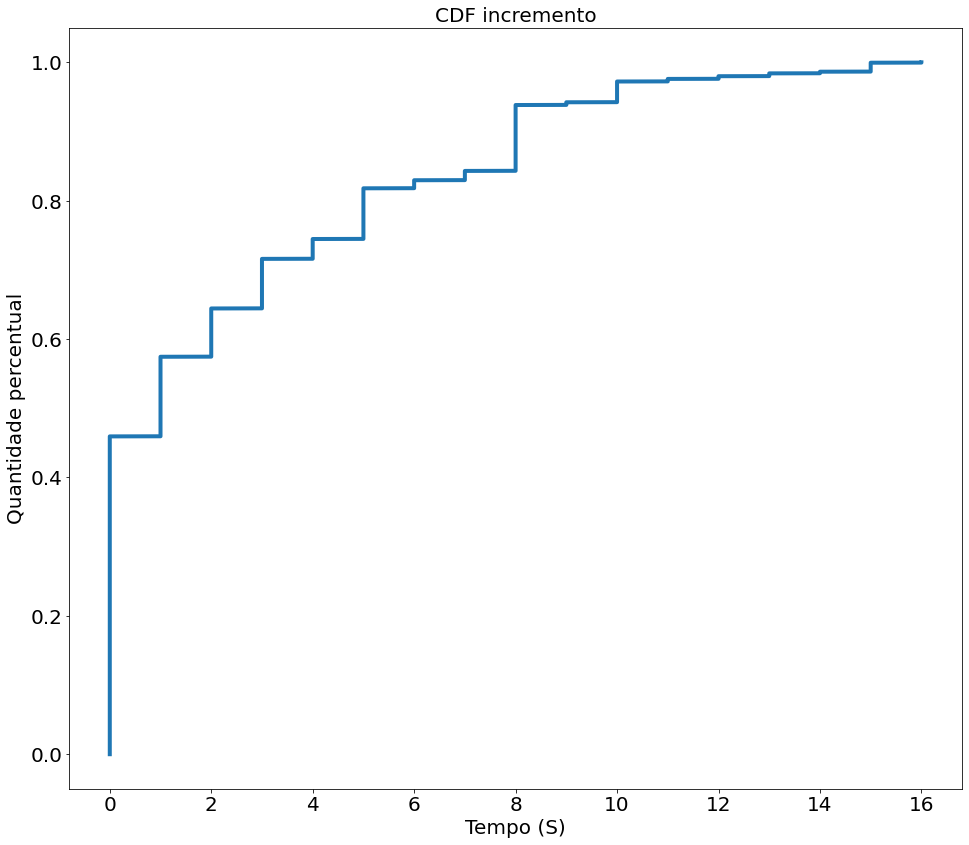

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf = ECDF(df['Increment'])
plt.title('CDF incremento')
plt.ylabel('Quantidade percentual')
plt.xlabel("Tempo (S)")
plt.plot(cdf.x,cdf.y)
plt.show()

In [ ]:
#10 most frequent opening
df_countWhiteWins = df.groupby(['ECO']).count().sort_values('Winner', ascending=False)['Winner'][0:10]
df_countWhiteWins

ECO
A00    7657
B00    4899
C00    4882
A40    4795
D00    4125
B01    3995
C41    3655
C20    3619
B20    2684
D02    1999
Name: Winner, dtype: int64

In [ ]:
#Average moves per
df_averageMovesPerGame = df['Number_of_Moves'].mean()
df_averageMovesPerGame

34.074715034528666

<BarContainer object of 3 artists>

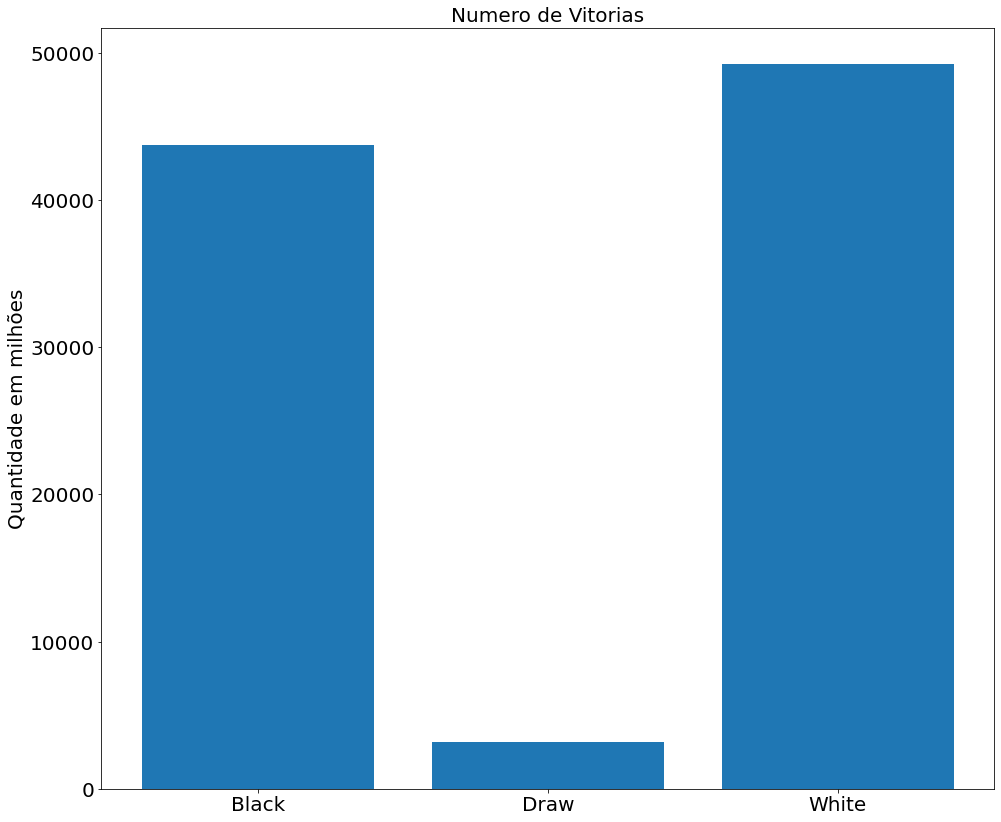

In [ ]:
df_winner = df.groupby('Winner').count()['ECO']
plt.ylabel('Quantidade em milhões')
plt.title('Numero de Vitorias')
plt.bar(x = df_winner.index,height=df_winner)

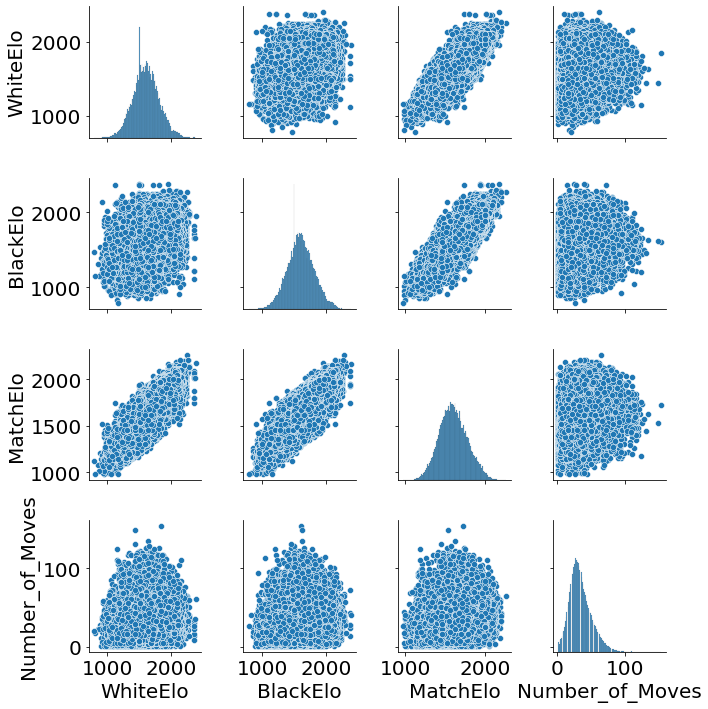

In [ ]:
sns.pairplot(df[['WhiteElo','BlackElo','MatchElo','Number_of_Moves']])

In [ ]:
BlackBranch = df[df['Winner'] == 'Black']
BlackBranch.head()


,WhiteElo,BlackElo,RatioElo,MatchElo,Winner,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves,IT_Zscore,Inc_Zscore
3,1824,1973,1.081689,1898.5,Black,60,1,Bullet,Caro-Kann Defense: Goldman Variation,B12,47,-0.836450,-0.436532
4,1765,1815,1.028329,1790.0,Black,60,1,Bullet,French Defense: La Bourdonnais Variation,C00,23,-0.836450,-0.436532
6,1541,1500,0.973394,1520.5,Black,300,0,Blitz,"Italian Game: Classical Variation, Giuoco Pian...",C53,19,-0.003105,-0.664506
9,1522,1428,0.938239,1475.0,Black,180,5,Blitz,Englund Gambit Complex: Hartlaub-Charlick Gambit,A40,45,-0.419778,0.475363
10,1644,1544,0.939173,1594.0,Black,600,8,Rapid,Modern Defense,B06,37,1.038577,1.159285


In [ ]:
WhiteBranch = df[df['Winner'] == 'White']
WhiteBranch.head()

,WhiteElo,BlackElo,RatioElo,MatchElo,Winner,InitialTime,Increment,TimeControl,Opening,ECO,Number_of_Moves,IT_Zscore,Inc_Zscore
0,1639,1403,0.856010,1521.0,White,600,8,Rapid,French Defense: Normal Variation,C00,13,1.038577,1.159285
1,1654,1919,1.160218,1786.5,White,480,2,Rapid,"Queen's Pawn Game: Colle System, Anti-Colle",D04,18,0.621904,-0.208558
5,1477,1487,1.006770,1482.0,White,300,3,Blitz,Owen Defense,B00,32,-0.003105,0.019416
7,1765,1752,0.992635,1758.5,White,540,0,Rapid,English Opening: The Whale,C20,28,0.830240,-0.664506
8,1445,1169,0.808997,1307.0,White,900,0,Rapid,Old Benoni Defense,A43,37,2.080258,-0.664506


In [ ]:
df_countWhiteWins = WhiteBranch.groupby(['ECO']).count().sort_values('Winner', ascending=False)['Winner'][0:10]
df_countWhiteWins

ECO
A00    3518
A40    2709
B00    2541
C00    2403
B01    2180
D00    2154
C41    2087
C20    1663
B20    1126
D02    1082
Name: Winner, dtype: int64

In [ ]:
df_countWhiteWins = BlackBranch.groupby(['ECO']).count().sort_values('Winner', ascending=False)['Winner'][0:10]
df_countWhiteWins

ECO
A00    3943
C00    2322
B00    2206
A40    1931
C20    1840
D00    1839
B01    1683
B20    1497
C41    1460
D02     818
Name: Winner, dtype: int64